In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

In [4]:
houses = pd.read_csv('dataset/houses_to_rent.csv')

In [3]:
houses.shape

(10692, 13)

# Cleaning Data

In [4]:
def cleaning(data):
    data.columns=data.columns.str.strip('( R$)')
    data.columns=data.columns.str.replace(' ','_')
    data.dtypes;
    data.floor.unique()
    'Replace the - by 0 since there is not a zero value in all the dataset, it may represent the ground floor'
    data.floor.replace('-','0',inplace=True)
    data.floor = data.floor.astype('int64')
    "let's create dummies for animal, furniture and convert floor to int"
    data.animal.unique()
    "let's create a dummy with animals"
    dummies_animal = pd.get_dummies(data['animal'],drop_first=True)
    data = pd.concat([data,dummies_animal],axis=1)
    data.drop('animal',inplace=True,axis=1)
    data.furniture.unique()
    furniture_dummies = pd.get_dummies(data['furniture'],drop_first=True)
    data = pd.concat([data,furniture_dummies],axis=1)
    data = data.drop('furniture',axis=1)
    return data

df = cleaning(houses)

# Model Rent House in Campinas

In [5]:
def filter_campinas(data):
    df_campinas = data[data.city=='Campinas']
    return df_campinas
df_campinas = filter_campinas(df)

In [6]:
df_campinas.corr()['rent_amount'].sort_values(ascending=False)

rent_amount       1.000000
fire_insurance    0.992372
total             0.972026
bathroom          0.782451
property_tax      0.706228
parking_spaces    0.647257
rooms             0.571506
hoa               0.419553
area              0.205780
floor            -0.056372
not furnished    -0.087981
not acept        -0.088636
Name: rent_amount, dtype: float64

In [7]:
# let's remove the tax and total from rent_amount bea
df_campinas = df_campinas.drop(['total','property_tax','hoa','fire_insurance'],axis=1)

In [8]:
df_campinas.isna().sum();

In [9]:
'No missing values in our dataset!'

'No missing values in our dataset!'

In [10]:
df_campinas.drop('city',axis=1,inplace=True)

In [11]:
Y_campinas = df_campinas['rent_amount']
X_campinas = df_campinas.drop('rent_amount',axis=1)

In [12]:
model = sm.OLS(Y_campinas,add_constant(X_campinas))

In [13]:
fitted_model = model.fit()

In [14]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 04 May 2020   Prob (F-statistic):          3.66e-190
Time:                        15:21:11   Log-Likelihood:                -7363.4
No. Observations:                 853   AIC:                         1.474e+04
Df Residuals:                     845   BIC:                         1.478e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            219.7297    176.161      1.247      0.213    -126.035     565.494
area               0.1826      0.107      1.706      0.088      -0.028       0.393
rooms            -12.7658     64.885     -0.197      0.844    -140.121     114.590
bathroom        1071.6043     55.382     19.349      0.000     962.901    1180.308
parking_spaces   366.5145     42.201      8.685      0.000     283.684     449.345
floor              7.5384     10.183      0.740      0.459     -12.449      27.526
not acept         50.9123    122.202      0.417      0.677    -188.943     290.768
not furnished   -648.1944    141.181     -4.591      0.000    -925.301    -371.088
==============================================================================
Omnibus:                      460.747   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5901.578
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                      15.139   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
"let's remove not accept columns"

"let's remove not accept columns"

In [16]:
def remove_col(col_name,data):
    # drop the column
    if col_name:
        data=data.drop(col_name,axis=1)
    # build the new model without this column
    model = sm.OLS(Y_campinas,add_constant(data))
    # fit it
    model_fit = model.fit()
    # display the model summary
    display(model_fit.summary())
    # return the X without the column
    return data

In [17]:
X_campinas = remove_col('not acept',X_campinas)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     267.1
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.34e-191
Time:                        15:21:18   Log-Likelihood:                -7363.5
No. Observations:                 853   AIC:                         1.474e+04
Df Residuals:                     846   BIC:                         1.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            239.6227    169.484      1.414      0.158     -93.035     572.281
area               0.1818      0.107      1.699      0.090      -0.028       0.392
rooms            -15.2962     64.569     -0.237      0.813    -142.030     111.438
bathroom        1072.7030     55.293     19.400      0.000     964.176    1181.230
parking_spaces   364.8977     42.001      8.688      0.000     282.458     447.337
floor              7.5202     10.178      0.739      0.460     -12.457      27.498
not furnished   -652.5943    140.717     -4.638      0.000    -928.789    -376.399
==============================================================================
Omnibus:                      463.376   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6000.395
Skew:                           2.174   Prob(JB):                         0.00
Kurtosis:                      15.244   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_campinas = remove_col('floor',X_campinas)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     320.5
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.63e-192
Time:                        15:21:19   Log-Likelihood:                -7363.7
No. Observations:                 853   AIC:                         1.474e+04
Df Residuals:                     847   BIC:                         1.477e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            285.7898    157.503      1.815      0.070     -23.352     594.931
area               0.1789      0.107      1.674      0.095      -0.031       0.389
rooms            -19.5010     64.300     -0.303      0.762    -145.708     106.706
bathroom        1075.9318     55.105     19.525      0.000     967.774    1184.090
parking_spaces   361.6250     41.756      8.660      0.000     279.668     443.582
not furnished   -658.2412    140.471     -4.686      0.000    -933.954    -382.528
==============================================================================
Omnibus:                      462.865   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5979.538
Skew:                           2.172   Prob(JB):                         0.00
Kurtosis:                      15.222   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_campinas = remove_col('rooms',X_campinas)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     401.1
Date:                Mon, 04 May 2020   Prob (F-statistic):          8.02e-194
Time:                        15:21:19   Log-Likelihood:                -7363.8
No. Observations:                 853   AIC:                         1.474e+04
Df Residuals:                     848   BIC:                         1.476e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            267.6799    145.666      1.838      0.066     -18.229     553.588
area               0.1772      0.107      1.661      0.097      -0.032       0.387
bathroom        1066.9957     46.541     22.926      0.000     975.647    1158.344
parking_spaces   358.8792     40.741      8.809      0.000     278.915     438.844
not furnished   -664.8855    138.678     -4.794      0.000    -937.078    -392.693
==============================================================================
Omnibus:                      462.830   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5950.787
Skew:                           2.173   Prob(JB):                         0.00
Kurtosis:                      15.188   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_campinas = remove_col('area',X_campinas)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     532.7
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.27e-194
Time:                        15:21:20   Log-Likelihood:                -7365.2
No. Observations:                 853   AIC:                         1.474e+04
Df Residuals:                     849   BIC:                         1.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            260.8221    145.758      1.789      0.074     -25.267     546.911
bathroom        1079.5370     45.972     23.483      0.000     989.306    1169.768
parking_spaces   359.6381     40.780      8.819      0.000     279.596     439.680
not furnished   -658.6066    138.770     -4.746      0.000    -930.979    -386.234
==============================================================================
Omnibus:                      464.341   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5987.962
Skew:                           2.182   Prob(JB):                         0.00
Kurtosis:                      15.224   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking assumptions

## Multicolinearity

Let's check if the X are dependant

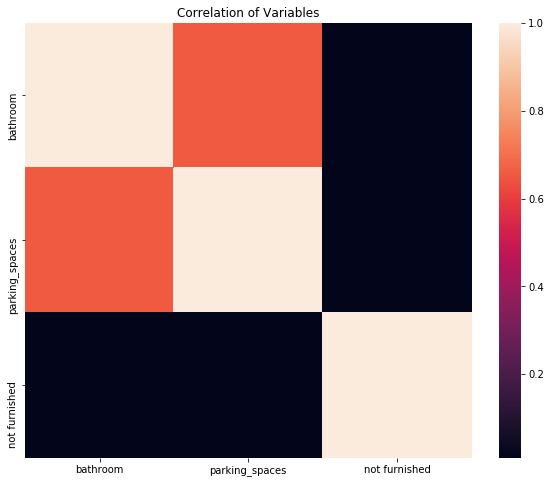

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(X_campinas.corr())
plt.title('Correlation of Variables')
plt.show()

Apparently, there is not correlation between X, but we will dive deeper into this check by calculating the VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [23]:
X1 = add_constant(X_campinas)

In [24]:
[VIF(X_campinas.values,i) for i in range(X_campinas.shape[1])]

[4.886524825780118, 3.6030001044866493, 2.4707684053887498]

All VIF are less than 10 so no correlation between X, so multicoliearity satisifed

## Autocorrelation

Durbin Watson test

In [25]:
fitted_model = sm.OLS(Y_campinas,add_constant(X_campinas)).fit()

In [26]:
resid = fitted_model.resid

In [27]:
durbin_watson(resid)

1.9719324833851049

Value is between 1.5 and 2.5 so there is no autocorrelation, so assumption satisfied

## Linearity

In [28]:
model=sm.OLS(Y_campinas,add_constant(X_campinas))
model_fit = model.fit()

Text(0.5, 1.0, 'Predicted rent price VS current price')

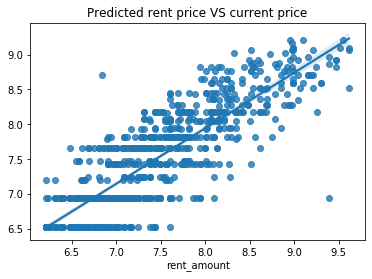

In [66]:
Y_campinas_predict = model_fit.predict(add_constant(X_campinas))
sns.regplot(np.log(Y_campinas),np.log(Y_campinas_predict))
ax = plt.gca()
ax.set_title("Predicted rent price VS current price")

Basically, let's check the linearity between X by plot.

In [30]:
X_campinas.nunique()[X_campinas.nunique()>2].index

Index(['bathroom', 'parking_spaces'], dtype='object')

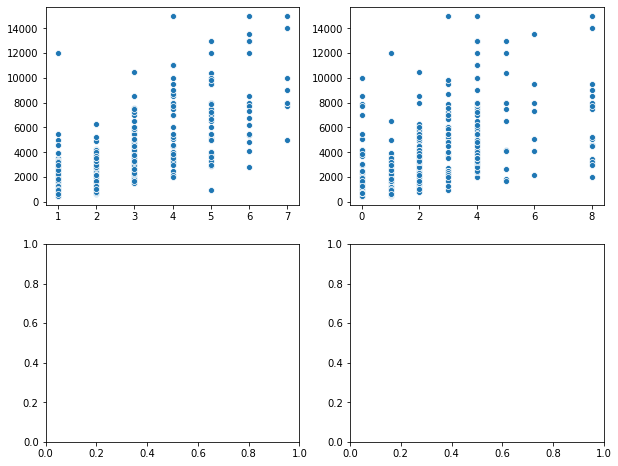

In [31]:
_,axes=plt.subplots(2,2,figsize=(10,8))
for idx,col in enumerate(X_campinas.nunique()[X_campinas.nunique()>2].index):
    sns.scatterplot(x=X_campinas[col].values,y=Y_campinas.values.ravel(), ax=axes[idx//2, idx%2])

In [32]:
dummies=X_campinas.nunique()[X_campinas.nunique()==2].index

In [33]:
X_campinas[dummies].sum(axis=1).min()

0

## Homoscedasticity

Residuals should have relative constant variance

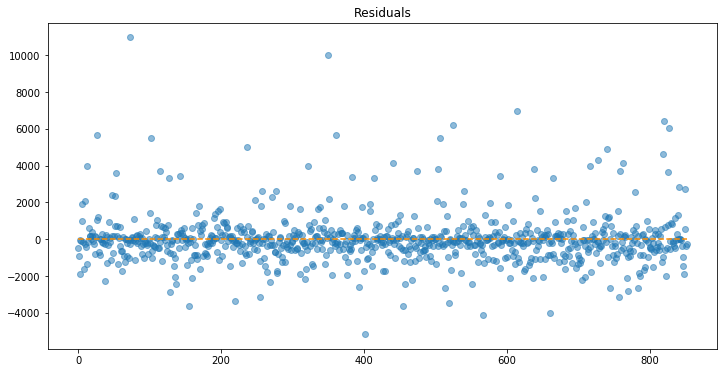

In [34]:
from numpy import repeat
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111) 
plt.scatter(x=range(X_campinas.shape[0]), y=resid, alpha=0.5)
plt.plot(repeat(0, X_campinas.shape[0]), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

According this graph we can conclude, that residuals are almost stable, unliss some spines coming from outliers.


In [35]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [36]:
lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
{lnames[idx]:het_breuschpagan(resid,X_campinas[:])[idx] for idx in range(4)}

{'Lagrange Multiplier': 147.6428440973137,
 'pvalue for LM': 8.704899431076121e-33,
 'F stats': 59.306322776821546,
 'pvalue for Fstats': 8.111451034278407e-35}

Both values of p_values are 0, so we reject Null Hypothesis and concluse that assumption is violated.

## Exogeneity of residuals

Text(0.5, 1.0, 'Distribution of residuals')

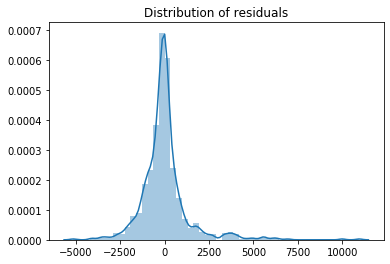

In [37]:

# plt.figure(figsize=(10,5))
# resid.plot.hist(bins=100)
# plt.title('distribution of residuals')
sns.distplot(resid)
ax = plt.gca()
ax.set_title("Distribution of residuals")

In [38]:
from statsmodels.stats.diagnostic import normal_ad
# Anderson-Darling test
p_value = normal_ad(resid)[1]
p_value

0.0

In [39]:
from scipy.stats import kstest
kstest(resid, 'norm')
p_value = kstest(resid, 'norm')[1]
p_value

4.119625577240292e-254

p_value equal to zero so the residuals are not normally distributed. So the assumtion exogenity is not satisfied. 

### Resultat:
- Assumption Multicoliearity is satisifed
- Assumption Autocorrelation is satisfied
- Assumption linearity is satisfied
- Assumption Homoscedasticity is violated
- Assumption Exogeneity is violated

# Model Rent House in Campinas without outliers

In [40]:
df_campinas

,area,rooms,bathroom,parking_spaces,floor,rent_amount,not acept,not furnished
11,46,1,1,1,10,580,0,1
15,330,4,6,6,0,8000,0,0
28,208,3,2,4,0,3180,0,1
48,250,3,3,2,1,1700,0,1
49,48,1,1,1,2,1600,0,0
...,...,...,...,...,...,...,...,...
10625,92,3,3,2,11,1700,0,1
10629,83,2,2,2,1,3700,0,0
10656,140,1,2,2,15,5200,0,1
10659,150,3,2,4,0,3500,0,0


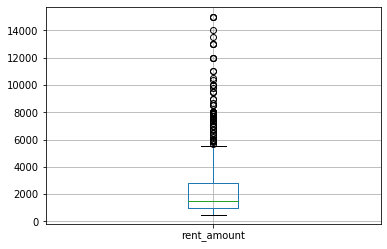

In [63]:
df_campinas.boxplot(column='rent_amount')

In [42]:
Q1 = Y_campinas.quantile(0.25)
Q3 = Y_campinas.quantile(0.75)
IQR = Q3 - Q1

In [43]:
lower = Q1 - IQR*1.6
upper = Q3 + IQR*1.6
print('lower : ',lower)
print('upper : ',upper)

lower :  -1880.0
upper :  5680.0


In [44]:
index_outliers = Y_campinas[(Y_campinas>upper)|(Y_campinas<lower)].index
len(index_outliers)

71

In [45]:
df_campinas.shape

(853, 8)

In [46]:
df2 = df_campinas.drop(index=index_outliers,axis=1)
df2.shape

(782, 8)

In [47]:
#df2 = df_campinas.loc[index_outliers,:]

In [48]:
Y2_campinas = df2.rent_amount
Y2_campinas

11        580
28       3180
48       1700
49       1600
57       5500
         ... 
10625    1700
10629    3700
10656    5200
10659    3500
10661    2200
Name: rent_amount, Length: 782, dtype: int64

In [49]:
X2_campinas = df2.drop('rent_amount',axis=1)

In [50]:
model2 = sm.OLS(Y2_campinas,add_constant(X2_campinas))
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 04 May 2020   Prob (F-statistic):          5.16e-164
Time:                        15:21:31   Log-Likelihood:                -6230.0
No. Observations:                 782   AIC:                         1.248e+04
Df Residuals:                     774   BIC:                         1.251e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            761.2897     95.115      8.004      0.000     574.575     948.004
area               0.0444      0.055      0.801      0.423      -0.064       0.153
rooms            122.0606     36.285      3.364      0.001      50.832     193.289
bathroom         548.8735     34.834     15.757      0.000     480.494     617.253
parking_spaces   274.6749     24.818     11.067      0.000     225.955     323.394
floor              9.8598      5.506      1.791      0.074      -0.949      20.669
not acept        -27.1275     64.811     -0.419      0.676    -154.353     100.098
not furnished   -683.5406     76.827     -8.897      0.000    -834.355    -532.727
==============================================================================
Omnibus:                      199.139   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.205
Skew:                           1.204   Prob(JB):                    7.17e-144
Kurtosis:                       6.799   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X2_campinas = X2_campinas.drop('not acept',axis=1)

In [52]:
model3 = sm.OLS(Y2_campinas,add_constant(X2_campinas))
fitted_model3 = model3.fit()
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 04 May 2020   Prob (F-statistic):          3.61e-165
Time:                        15:21:32   Log-Likelihood:                -6230.1
No. Observations:                 782   AIC:                         1.247e+04
Df Residuals:                     775   BIC:                         1.251e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            750.4386     91.465      8.205      0.000     570.889     929.988
area               0.0449      0.055      0.810      0.418      -0.064       0.154
rooms            123.8556     36.011      3.439      0.001      53.164     194.547
bathroom         547.9435     34.744     15.771      0.000     479.739     616.148
parking_spaces   275.5634     24.714     11.150      0.000     227.048     324.078
floor              9.8604      5.503      1.792      0.074      -0.943      20.664
not furnished   -681.3358     76.605     -8.894      0.000    -831.714    -530.957
==============================================================================
Omnibus:                      199.213   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.543
Skew:                           1.201   Prob(JB):                    3.01e-145
Kurtosis:                       6.828   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X2_campinas = X2_campinas.drop('area',axis=1)
model4 = sm.OLS(Y2_campinas,add_constant(X2_campinas))
fitted_model4 = model4.fit()
fitted_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     267.9
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.91e-166
Time:                        15:21:32   Log-Likelihood:                -6230.4
No. Observations:                 782   AIC:                         1.247e+04
Df Residuals:                     776   BIC:                         1.250e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            748.7174     91.420      8.190      0.000     569.257     928.178
rooms            125.6377     35.936      3.496      0.000      55.094     196.181
bathroom         550.1318     34.631     15.885      0.000     482.149     618.114
parking_spaces   274.8579     24.694     11.131      0.000     226.384     323.332
floor              9.7238      5.500      1.768      0.077      -1.072      20.520
not furnished   -680.4858     76.581     -8.886      0.000    -830.817    -530.155
==============================================================================
Omnibus:                      199.097   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.759
Skew:                           1.199   Prob(JB):                    1.64e-145
Kurtosis:                       6.835   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X2_campinas = X2_campinas.drop('floor',axis=1)
model5 = sm.OLS(Y2_campinas,add_constant(X2_campinas))
fitted_model5 = model5.fit()
fitted_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     333.2
Date:                Mon, 04 May 2020   Prob (F-statistic):          7.10e-167
Time:                        15:21:32   Log-Likelihood:                -6232.0
No. Observations:                 782   AIC:                         1.247e+04
Df Residuals:                     777   BIC:                         1.250e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            807.9770     85.171      9.487      0.000     640.784     975.170
rooms            119.8759     35.837      3.345      0.001      49.527     190.225
bathroom         555.0288     34.568     16.056      0.000     487.172     622.886
parking_spaces   271.1575     24.638     11.006      0.000     222.792     319.523
not furnished   -688.9744     76.535     -9.002      0.000    -839.214    -538.734
==============================================================================
Omnibus:                      201.746   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.475
Skew:                           1.210   Prob(JB):                    8.59e-150
Kurtosis:                       6.900   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

without  outiers:

- R-squared:	0.632
- Prob (F-statistic):	7.10e-167
- AIC: 1.247e+04

with outiers:

- R-squared:	0.653
- Prob (F-statistic):	1.27e-194
- AIC: 1.474e+04

--> We can deduce that the AIC of the model without outliers is less than the one with outliers.So this model minimizes the estimated information loss.

## Multicolinearity:

In [55]:
vifs = {i:VIF(X2_campinas.values, idx) for idx,i in enumerate(X2_campinas.columns.to_list())}
vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
for key, vif in vifs.items():
    print(f'{key}: {vif}')

rooms: 10.723422210219711
bathroom: 7.537765960215273
not furnished: 4.307550931583564
parking_spaces: 3.2783284244822726


1 case of possible multicolinearity among predictors

## Autocorrelation

In [56]:
resid2 = fitted_model5.resid
durbin_watson(resid2)

2.014466841011868

## Linearity

Text(0.5, 1.0, 'Predicted rent price VS current price')

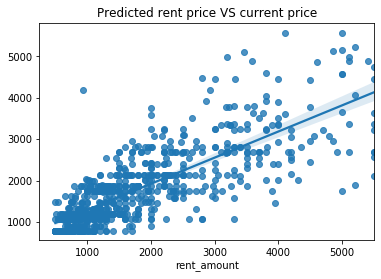

In [57]:
import numpy as np
Y2_predict = fitted_model5.predict(add_constant(X2_campinas))
sns.regplot((Y2_campinas),(Y2_predict))

ax = plt.gca()
ax.set_title("Predicted rent price VS current price")

As a result, we still having the linear trend but multiple spines

## HOMOSCEDASTICITY

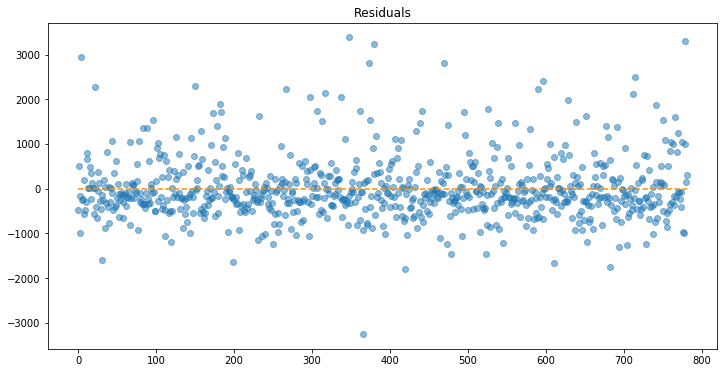

In [58]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=range(X2_campinas.shape[0]), y=resid2, alpha=0.5)
plt.plot(repeat(0, X2_campinas.shape[0]), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

In [59]:
lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
{lnames[idx]:het_breuschpagan(resid,X_campinas[:])[idx] for idx in range(4)}

{'Lagrange Multiplier': 147.6428440973137,
 'pvalue for LM': 8.704899431076121e-33,
 'F stats': 59.306322776821546,
 'pvalue for Fstats': 8.111451034278407e-35}

## Exogeneity

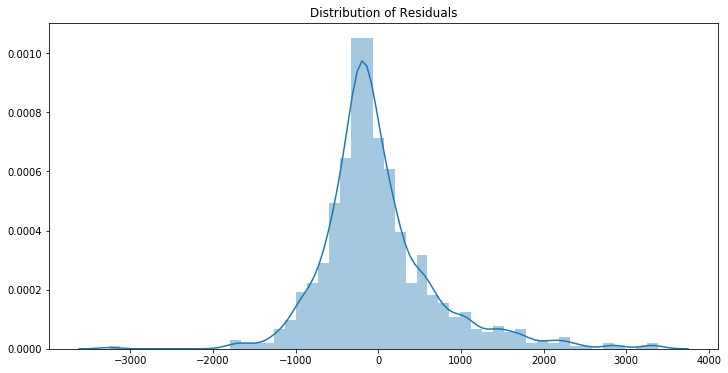

In [60]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(resid2)
plt.show()

In [61]:
## checking for normality
normal_ad(resid2)[1]

0.0